## EDA Techniques

In [1]:
import pandas as pd

url = 'nyc_flights.csv'
flights = pd.read_csv(url)

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np

# Graph plot libraries seaborn, matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

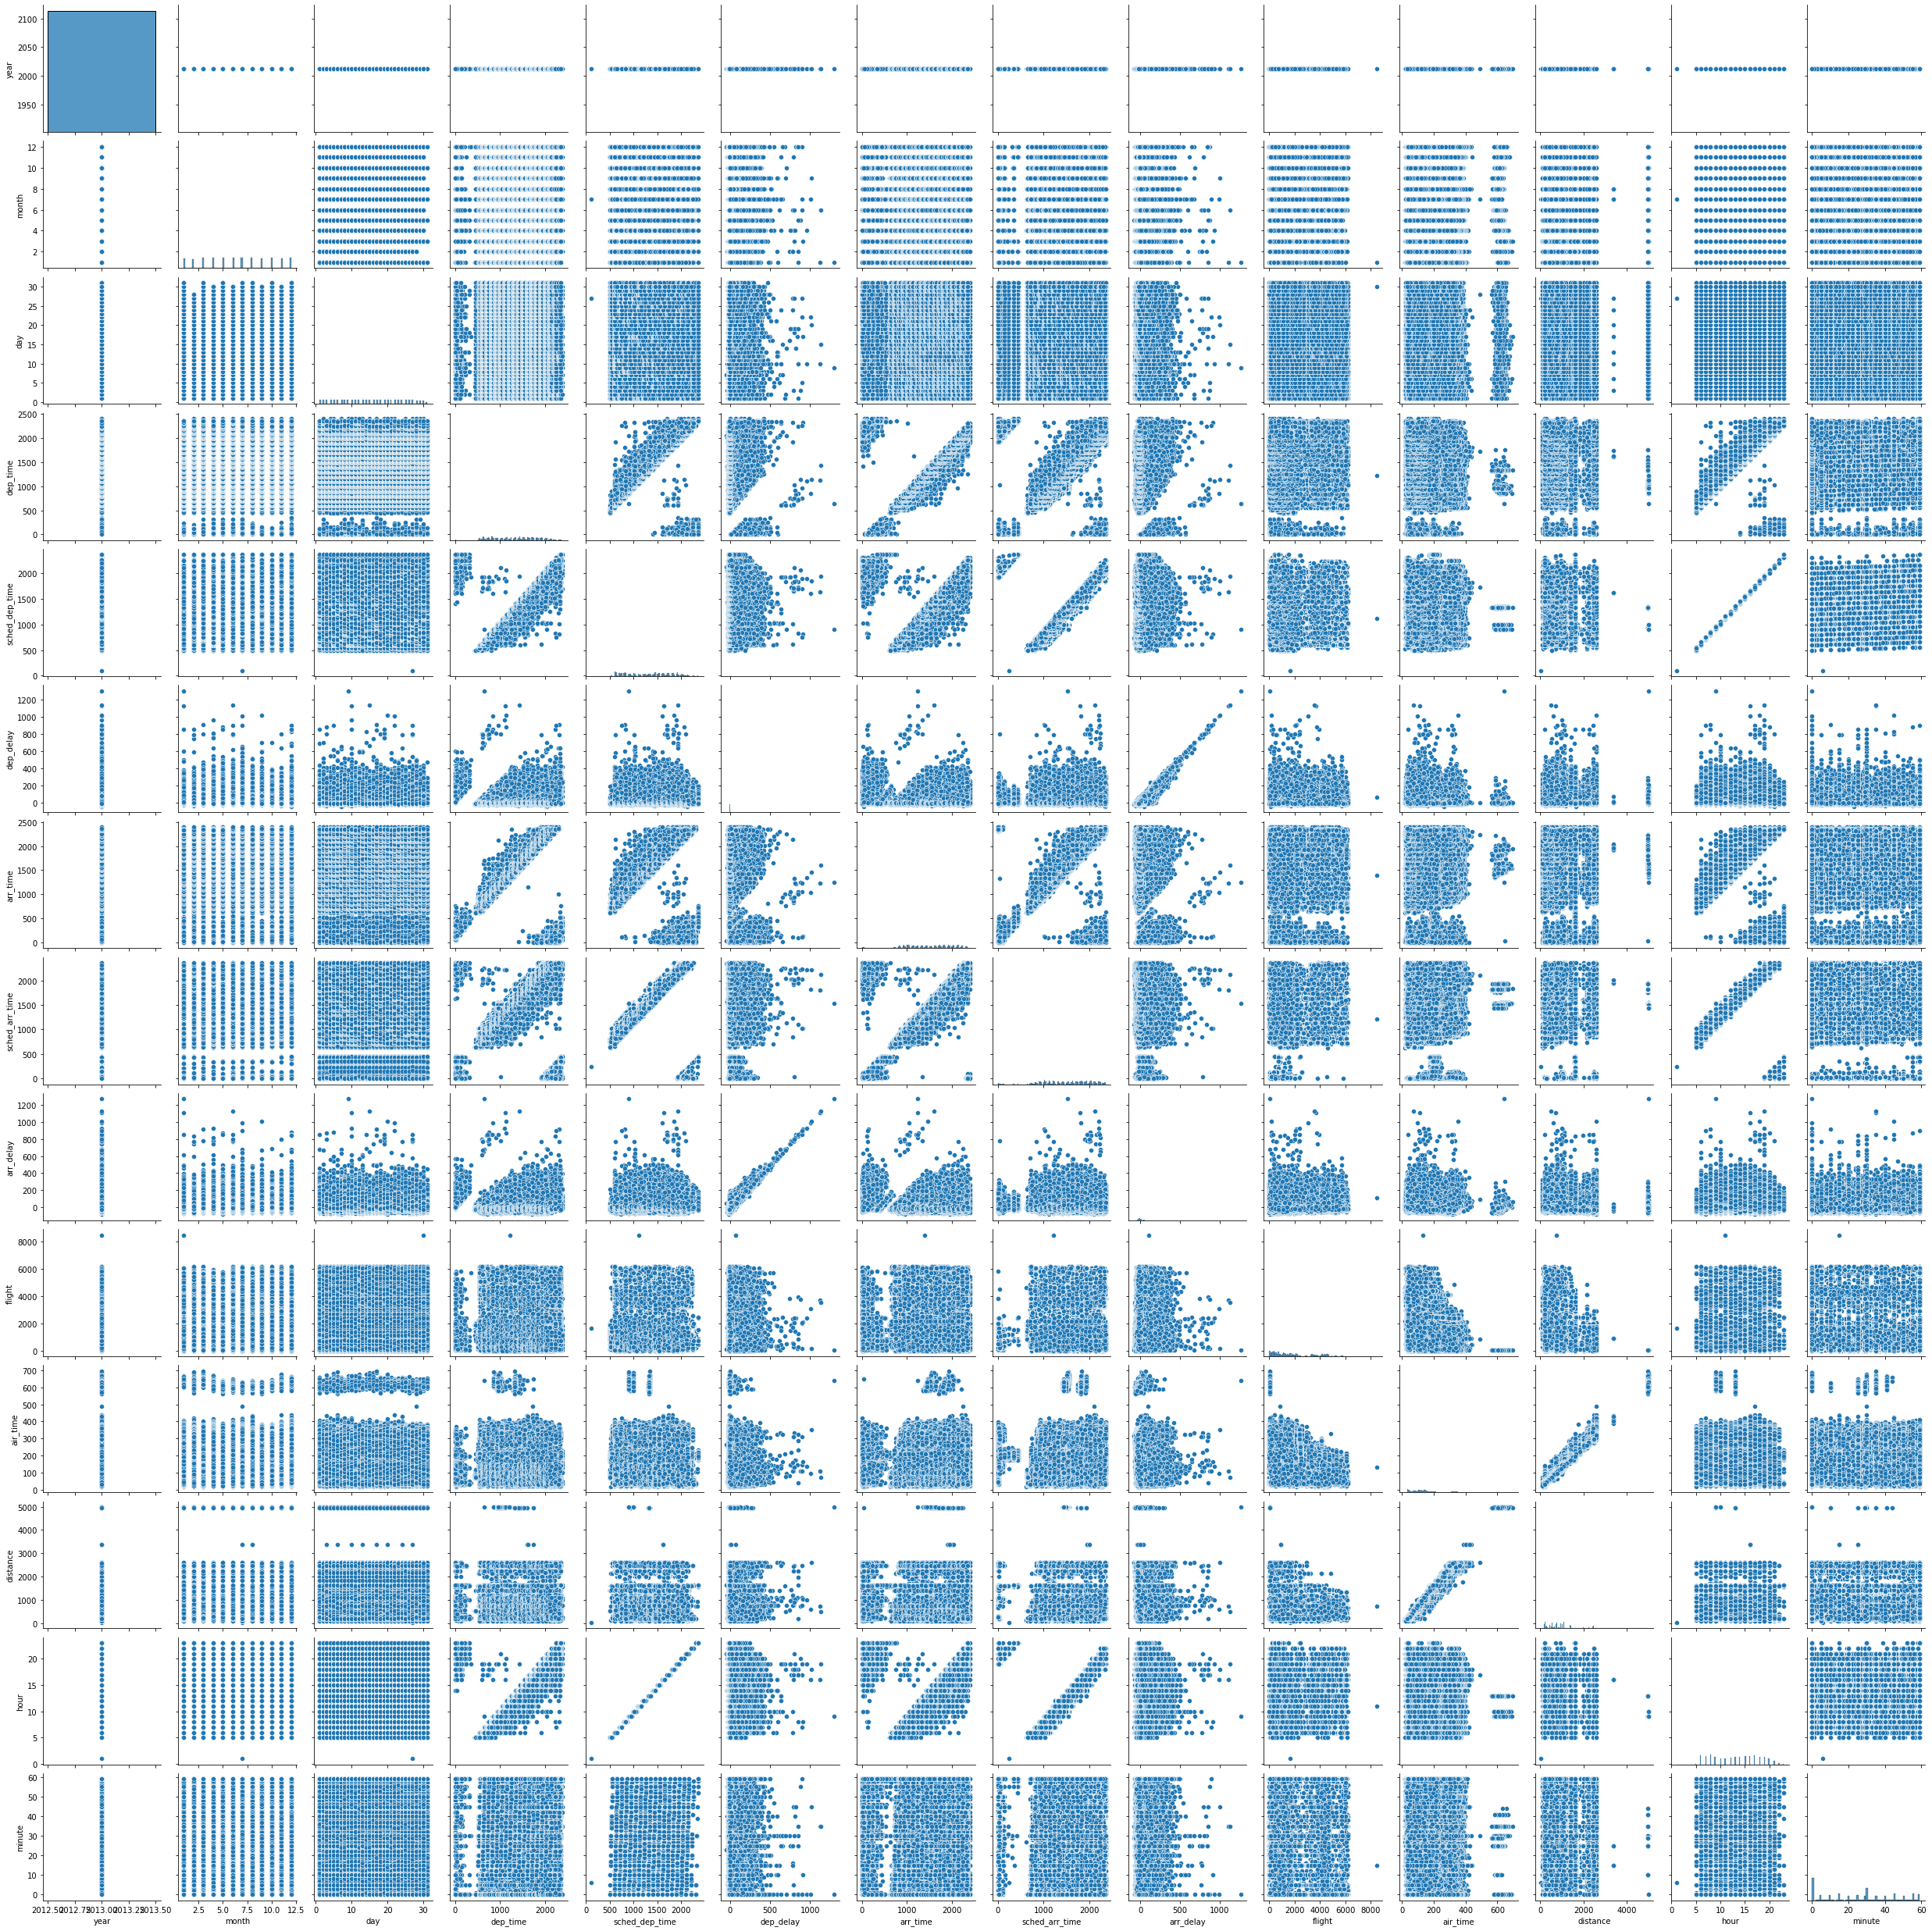

In [3]:
## pairplot will plot cloumns v/s columns of the given dataset 
sns.pairplot(flights)

#### Visualising distributions

* Lets walk through differnt types of graphs

#### Categorical Variables

#### Graph 1

#### Which airlines are most common?

    * Number of flights per each airlines

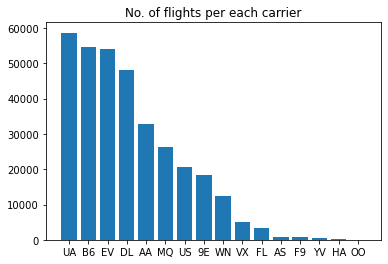

'\n    we can Analyze from this graph that most of the flights belongs to UA, B6, EV airlines and least opertaed are OO,\n    HA, YV, F9, AS, FL\n'

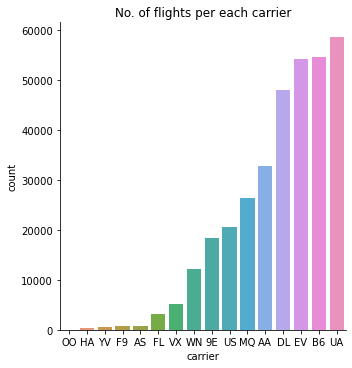

In [4]:
## Let's see the number of flights for each different type of carrier

carriers = flights.carrier.value_counts()

# Try with matplotlib bar chart
plt.bar(x = carriers.index, height = carriers.values)
plt.title('No. of flights per each carrier')
plt.show()

# Try with seaborn chart
## we can use catplot for showing the count, order of the graph can also be mentioned here
plot = sns.catplot(data= flights, kind = 'count', x = 'carrier', aspect=1, order = ['OO','HA','YV','F9','AS','FL','VX','WN','9E',
                                                                                   'US','MQ','AA','DL','EV','B6',
                                                                                   'UA'])
plot.ax.set_title('No. of flights per each carrier')

'''
    we can Analyze from this graph that most of the flights belongs to UA, B6, EV airlines and least opertaed are OO,
    HA, YV, F9, AS, FL
'''


#### Graph 2 & Graph 3

* Check max number of airline between origin and dest
* Check min number of airlines between origin and dest

<AxesSubplot:xlabel='origin,dest,carrier'>

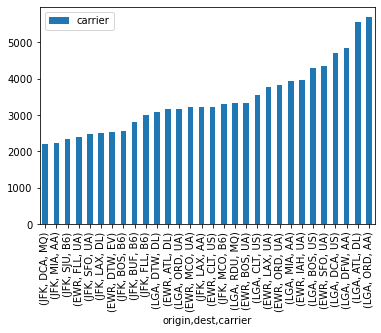

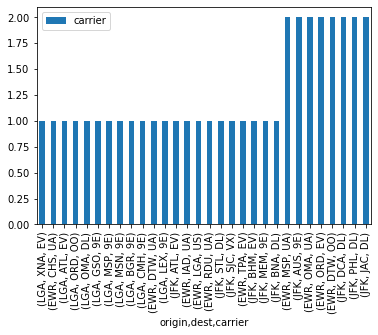

In [5]:
high_count_flights=flights.groupby(['origin','dest'])['carrier'].value_counts().sort_values().groupby(level=0).tail(10)
high_count_flights=pd.DataFrame(high_count_flights)
high_count_flights.plot(kind='bar')

low_count_flights=flights.groupby(['origin','dest'])['carrier'].value_counts().sort_values().groupby(level=0).head(10)
low_count_flights=pd.DataFrame(low_count_flights)
low_count_flights.plot(kind='bar')

* Analyisis

    We can see that between (LGA, ORD) max number of flights are run by AA. Also, least number of airlines between (LGA, ORD) is OO

#### Continuous Variables

#### Graph 4 set

Text(0.5, 1.0, 'hist graph for dep_delay values')

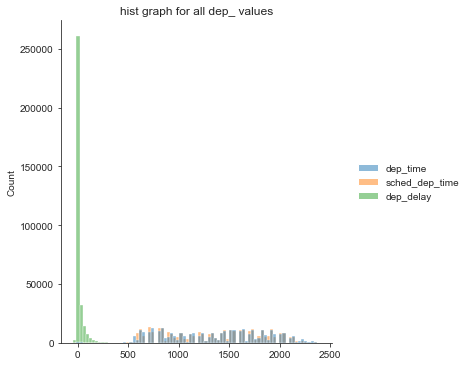

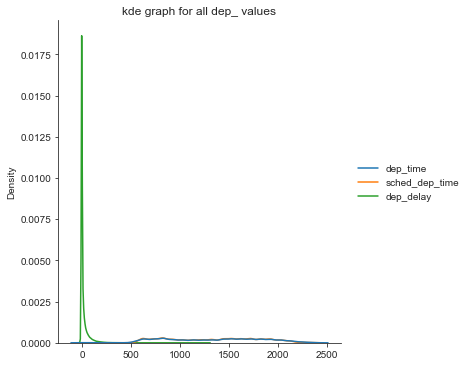

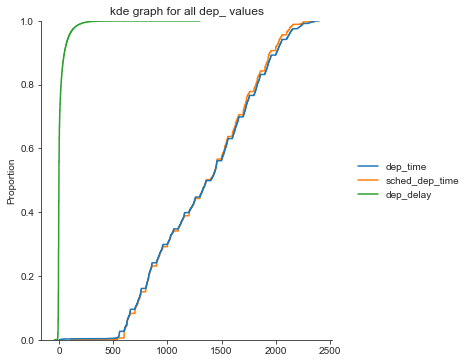

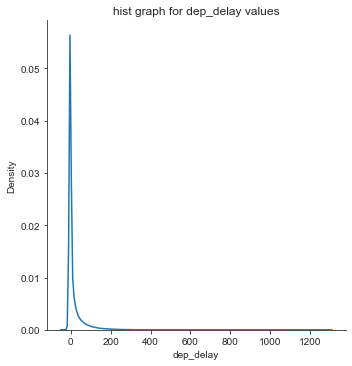

In [6]:
# Lets analyze all columns respect to departure continous variable
# Using displot we can see the graph with respect to Kde - kernel distribution, ecdf and hist
sns.set_style('ticks')
plot1=sns.displot(data=flights.filter(like="dep_", axis="columns"),kind = 'hist')
plot1.ax.set_title('hist graph for all dep_ values')
plot2=sns.displot(data=flights.filter(like="dep_", axis="columns"),kind = 'kde')
plot2.ax.set_title('kde graph for all dep_ values')
plot3=sns.displot(data=flights.filter(like="dep_", axis="columns"),kind = 'ecdf')
plot3.ax.set_title('kde graph for all dep_ values')

# We can even apply to single column and check the distribution for that variable
plot = sns.displot(data = flights, x= 'dep_delay', kind = 'kde')
plot.ax.set_title('hist graph for dep_delay values')

#### Analysis

* We can see that both dep_time and sched_dep_time are alomst aligned and in very few parts its not. So most of the flights were as per scheduled Departure time except for few which can be seen in dep_delay pattern.

#### Graph 5

Text(0.5, 1.0, 'ecdf graph for all arr_ values')

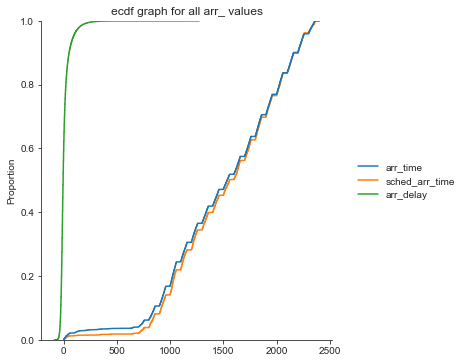

In [7]:
# Lets analyze all columns respect to arrival continous variable
sns.set_style('ticks')
plot=sns.displot(data=flights.filter(like="arr_", axis="columns"),kind = 'ecdf')
plot.ax.set_title('ecdf graph for all arr_ values')

#### Analysis

* We can see that both arr_time and sched_arr_time are alomst aligned and in very few parts its not. So most of the flights were as per scheduled time except for few which can be seen in arr_delay pattern.

#### Graph 6

/var/folders/wb/mynt_v_579n87q8ddq2_5w300000gn/T/ipykernel_26116/2807834522.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  flights1=flights.groupby(['origin','dest'])['dep_delay'].mean().max(level=0)


Text(0.5, 1.0, 'dep_deay mean values per origin')

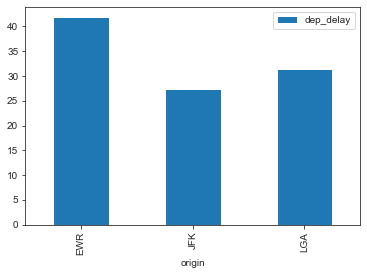

In [8]:
# Check mean of dep_delay for each origin, dest

flights1=flights.groupby(['origin','dest'])['dep_delay'].mean().max(level=0)
flights1=pd.DataFrame(flights1)

flights1.plot(kind='bar')
plot.ax.set_title('dep_deay mean values per origin')

#### Analysis

* The max dep_delay took place at EWR Airport.

#### Multivariate Distribution - Study of covariation
#### Categorical Variables vs Categorical Variables

#### Graph 7

Text(0.5, 1.0, 'No. of airways operated for each origin')

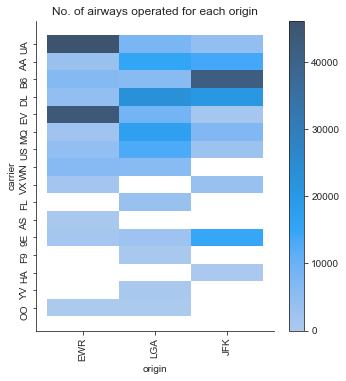

In [9]:
#check which airway is max operated in each origin

plot = sns.displot(flights, x="origin", y="carrier", cbar = True)
plot.ax.tick_params(labelrotation = 90)
plot.ax.set_title('No. of airways operated for each origin')

#### Analysis

* At EWR airport the max number of airlines were operated by UA (United Airlines)
* At LGA airport the max number of airlines were operated by DL (Delta Airlines)
* At JFK airport the max number of airlines were operated by B6 (Jet Blue Airways)

#### Graph 8 & 8.1

Text(0.5, 1.0, 'No. of cancelled_flights for each carrier')

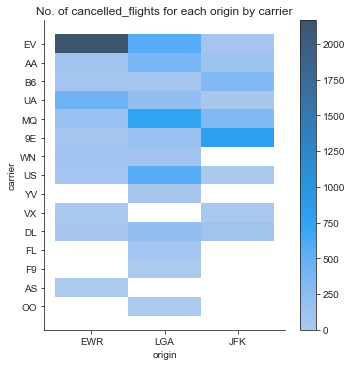

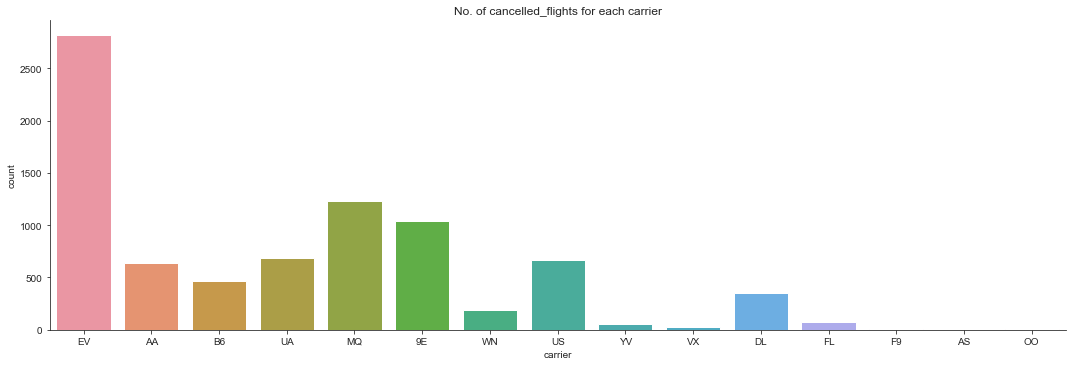

In [10]:
# Cancelled flights details. Most cancelled carriers and their origin

cancelled_flights=flights.dep_time.isna()
# creating dataframe cancelled filghts
cancelled_flights=flights[cancelled_flights].copy()
# Inserting new column
cancelled_flights['cancelled_flights_dep_time'] = True

# 2 catogorical variables
plot = sns.displot(cancelled_flights, x="origin", y="carrier", cbar = True)
plot.ax.set_title('No. of cancelled_flights for each origin by carrier')

# 1 catogorical variable
plot = sns.catplot(data= cancelled_flights, kind = 'count', x = 'carrier', aspect=3)
plot.ax.set_title('No. of cancelled_flights for each carrier')

#### Analysis 

* At EWR airport most cancelled flights belonged to EV airlines. Similarly at LGA and JFK airport the most cancelled flights belonged to MQ and 9E airways respectively.

* If we just pull the count of cancelled flights by each airways then we can see that maximum cancellations are done by EV.

#### Graph 9 & 9.1

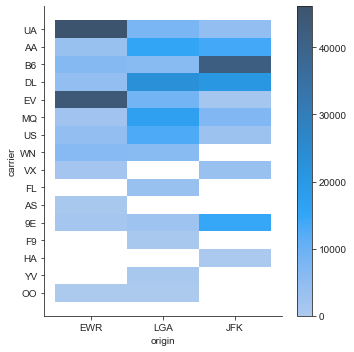

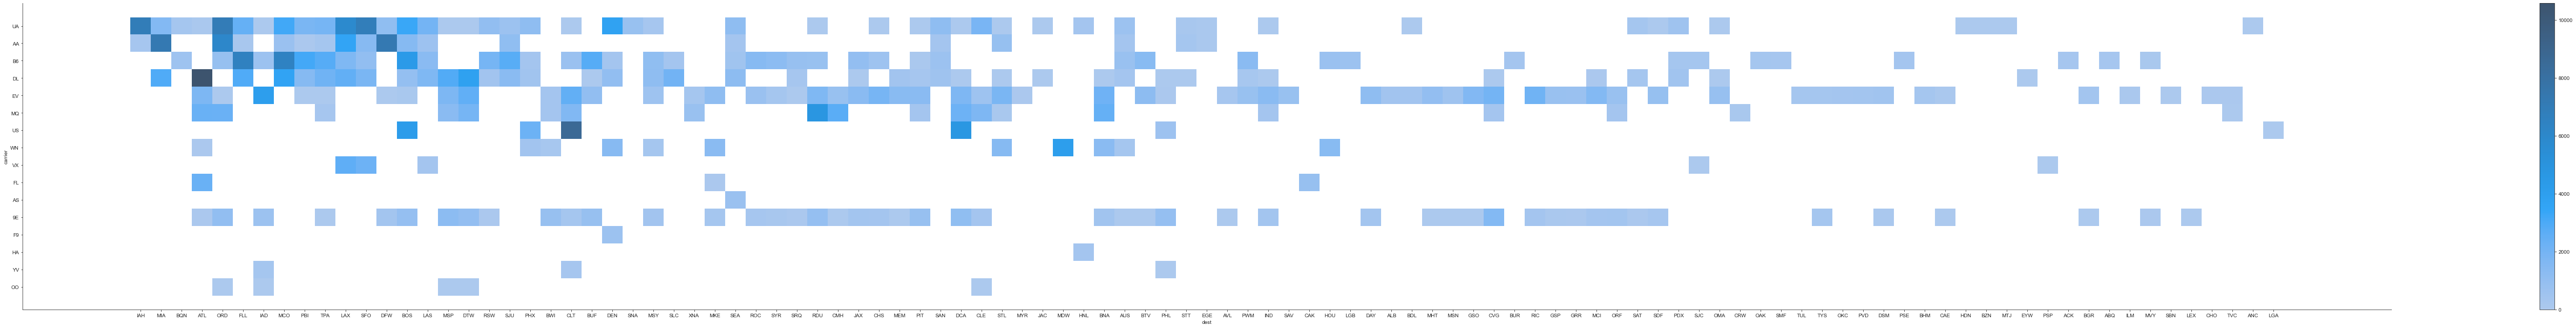

In [11]:
#which origin has which max carriers

plot = sns.displot(flights, x="origin", y="carrier", cbar = True)

# which destination has max carriers

plot = sns.displot(flights, x="dest", y="carrier", cbar = True, aspect=9, height=9)

#### Analysis

* At EWR airport max flights belongs to UA and EV airways. Likewsie in LGA and JFK most flights belongs to DL and B6 respectively.

#### Categorical vs Numerical varibles

#### Graph 10 set

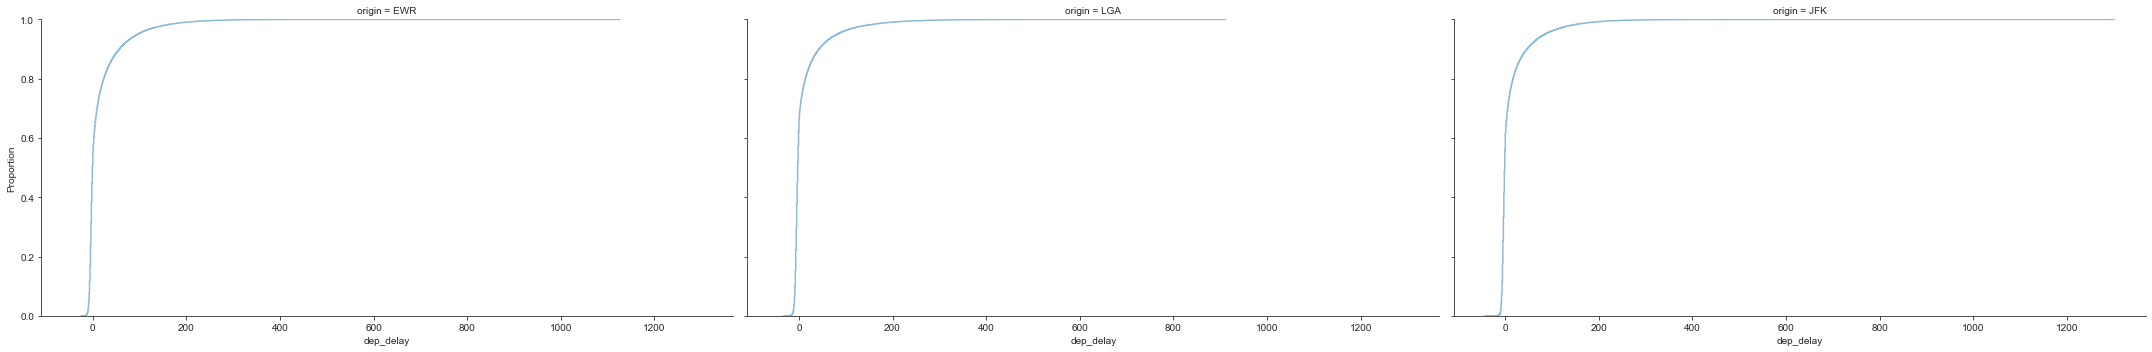

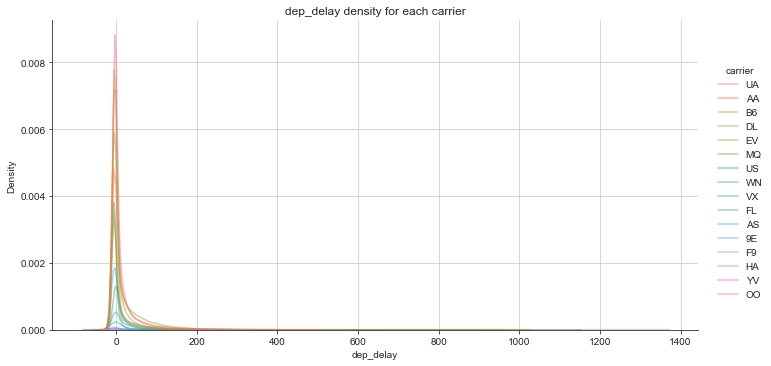

In [12]:
# analysis of dep_delay v/s origin and carrier
plot= sns.displot(data=flights, kind="ecdf", x="dep_delay", col = 'origin', aspect=2, alpha=0.5)
#plot.ax.set_title("dep_delay proportion for each origin")
plot= sns.displot(data=flights, kind="kde", x="dep_delay", hue = 'carrier', aspect=2, alpha=0.5)
plot.ax.set_title("dep_delay density for each carrier")
plot.ax.grid()

#### Analysis 

* From above graphs we can analyse that UA has max dep_delay and usually delays are max in EWR airport.

#### Graph 10.1

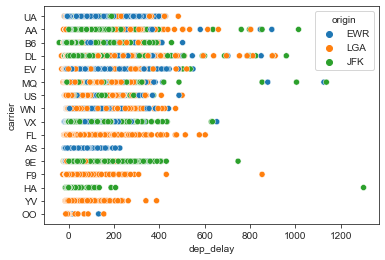

In [13]:
# By passing hue we can combine above two graphs into single has shown below
plot = sns.scatterplot(data = flights, x= 'dep_delay', y= 'carrier', hue='origin')

#### Analysis

* At EWR airport the max number delays ocuured by UA, EV and AS airways. Similarly, in LGA max delays was by FL, F9, YV and OO carriers. Additionally at JFK, 9E, VX, B6 and AA caused the max delays.

#### Graph 11

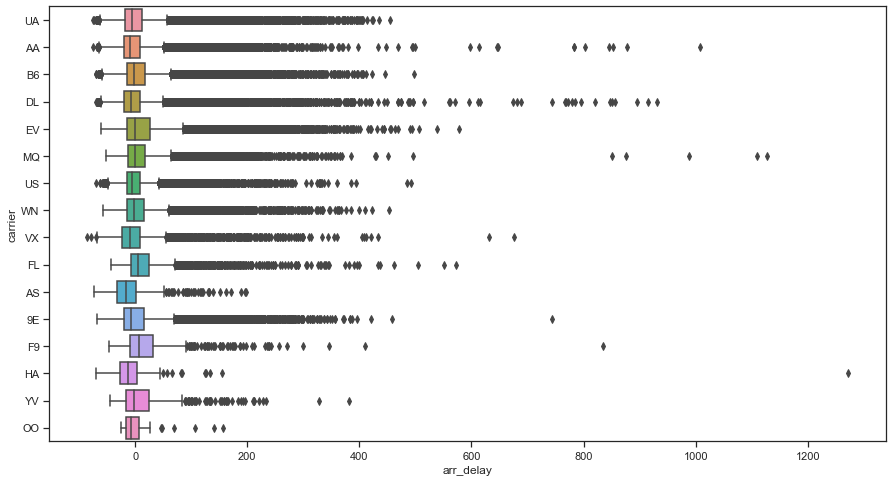

In [14]:
# box plot

sns.set(rc={"figure.figsize":(15, 8)}) #width=15, #height=8
sns.set_style('ticks')

plot = sns.boxplot(y = 'carrier', x = 'arr_delay', data=flights)

#### Analysis 

* We can see that on an average the maxmium arrival delays are with F9, EV, YV and FL carriers

#### Graph 12

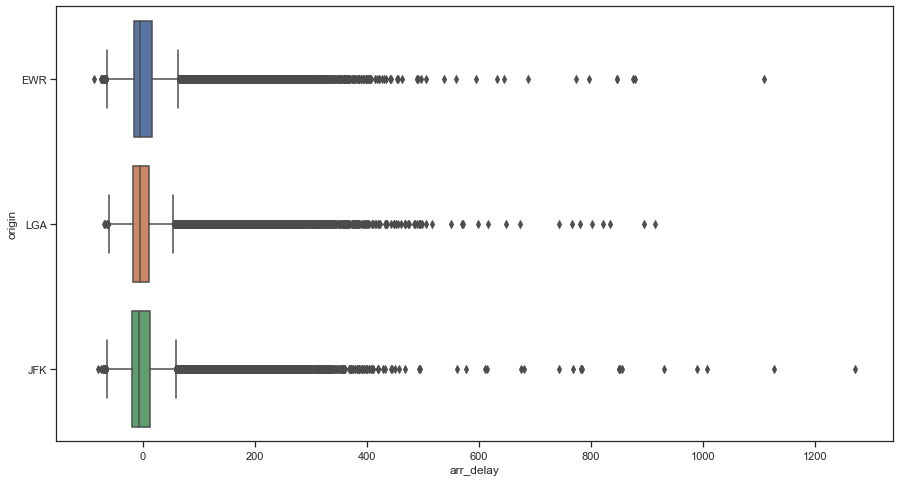

In [15]:
plot = sns.boxplot(y = 'origin', x = 'arr_delay', data = flights )

#### Analysis

* The max arr_delay we could see is at JFK but if we look at avearge values the maximum arr_delays happens at EWR Airport.

<AxesSubplot:xlabel='origin', ylabel='arr_delay'>

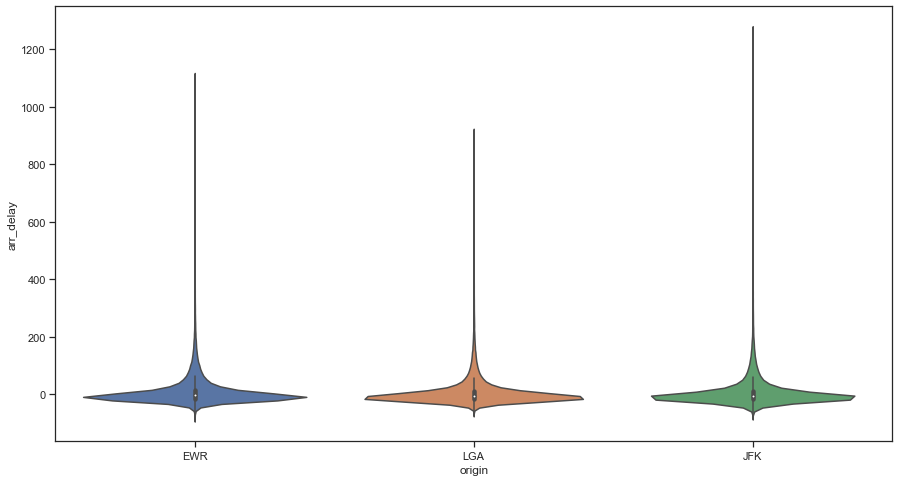

In [16]:
# similar analysis with violinplot
sns.violinplot(x = 'origin', y = 'arr_delay', data = flights )

#### Continuous to Continuous Variables

#### Graph 13

Text(0.5, 1.0, 'Relation between dep_delay and arr_delay')

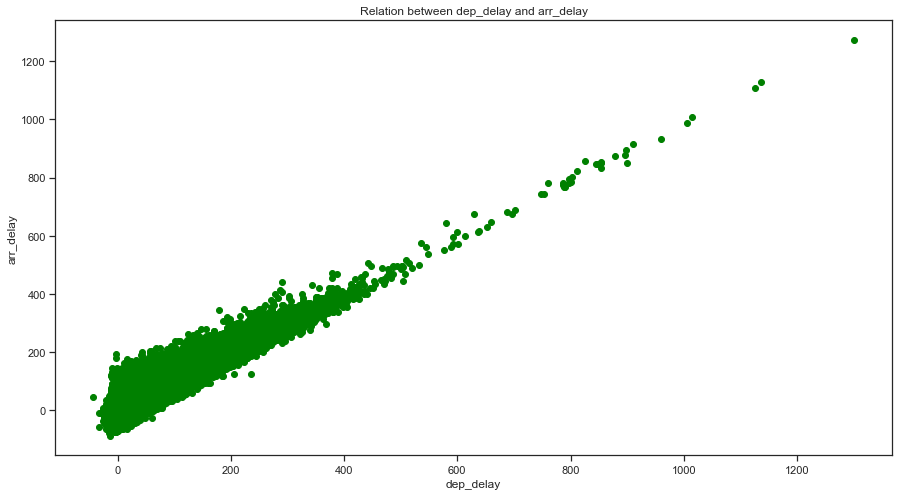

In [17]:
# Lets check the relation between dep_delay and arr_delay
plt.scatter(data = flights, x="dep_delay", y="arr_delay", color='green')
plt.xlabel('dep_delay')
plt.ylabel('arr_delay')
plt.title('Relation between dep_delay and arr_delay')

#### Analysis 

* We can conclude from above graph that arr_delay is directly proportional to dep_delay. 

#### Graph 14

Text(0.5, 1.0, 'Distribution between sched_dep_time and dep_time')

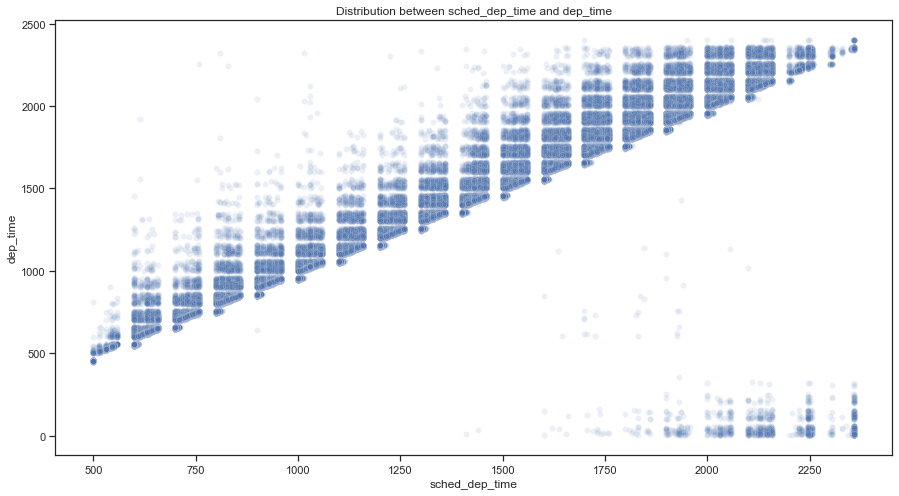

In [18]:
plot = sns.scatterplot(data = flights, x="sched_dep_time", y="dep_time", alpha = 0.1)
plot.set_title('Distribution between sched_dep_time and dep_time')

Text(0.5, 1.0, 'Distribution between sched_arr_time and arr_time')

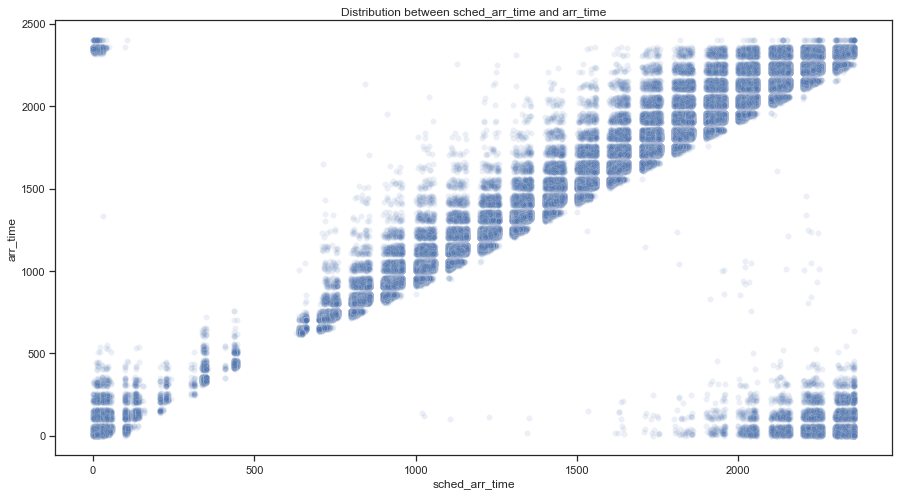

In [19]:
plot1 = sns.scatterplot(data = flights, x="sched_arr_time", y="arr_time", alpha = 0.1)
plot1.set_title('Distribution between sched_arr_time and arr_time')

#### Analysis

* Most of the values are inclined with sched_dep_time and dep_time but there are few points which shows the dep_delay in the time.

#### Graph 15

Text(0.5, 1.0, 'Distribution between distance and air_time')

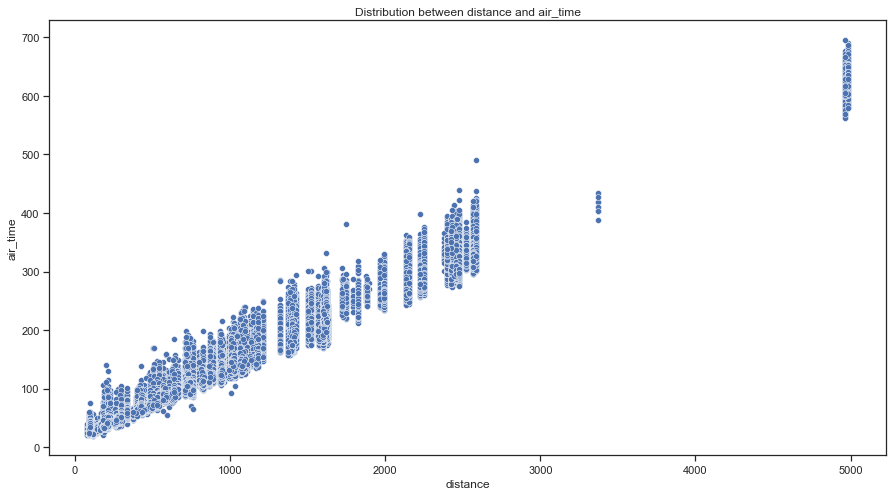

In [20]:
plot = sns.scatterplot(data = flights, x= 'distance', y= 'air_time')
plot.set_title('Distribution between distance and air_time')

#### Analysis 

* We can see that as distance is increasing the air_time has also increased hence we can conclude that distance and air_time are directly proportional.

## Final Report of Findings

#### Column type division between catogorical and continous 

* categorical variable's:
    *        carrier, flight, talinum, origin, dest
* continous variables:
    *        'dep_time', 'sched_dep_time', 'dep_delay'
    *        'arr_time', 'sched_arr_time', 'arr_delay'
    *        'air_time', 'distance', 'hour', 'minute', 'time_hour'
    
### Analysis
    
### Categorical Variables

#### 1. Which airlines are most common?

    * Graph 1 - Number of flights per each airlines
    we can Analyze from this graph that most of the flights belongs to UA, B6, EV airlines and least opertaed are OO,HA, YV, F9, AS, FL
    * Hence we can conclude that the most common airline is UA.
    
#### 2. Which airlines have max flights between origin and dest?
    * Graph 2
    The graph shows the data for highest 10 spots in which between (LGA, ORD) max number of flights are run by AA. 

#### 3. Which airlines have min flights between origin and dest?
    * Graph 3
    The least number of flights between (LGA, ORD) is run by OO.
    
### Continues Variables  
    
#### 4. Analyze the relation between all depature parameters - dep_time, dep_delay, sched_dep_time
    * Graph 4 set
    We can see that both dep_time and sched_dep_time are alomst aligned and in very few parts its not. So most of the flights were as per scheduled Departure time except for few which can be seen in dep_delay pattern.
    
#### 5. Analyze the relation between all arrival parameters - arr_time, arr_delay, sched_arr_time
    * Graph 5
    We can see that both arr_time and sched_arr_time are alomst aligned and in very few parts its not. So most of the flights were as per scheduled time except for few which can be seen in arr_delay pattern.
    
#### 6. Which airport has max dep_delay on avergae for each origin, dest
    * Graph 6
    The max averge delays happens at EWR airport.
    
#### 7. Which airway is max operated in each origin
    * Graph 7
    At EWR airport the max number of flights were operated by UA (United Airlines)
    At LGA airport the max number of flights were operated by DL (Delta Airlines)
    At JFK airport the max number of flights were operated by B6 (Jet Blue Airways)
    
#### 8. Find which airways cancelled maximum flights for each origin
    * Graph 8 & 8.1
    At EWR airport most cancelled flights belonged to EV airlines. Similarly at LGA and JFK airport the most cancelled flights belonged to MQ and 9E airways respectively.
    If we just pull the count of cancelled flights by each airways then we can see that maximum cancellations are done by EV.
    
#### 9. which origin has which max carriers and similarly find for dest.
    * Graph 9 & 9.1
    EWR airport has max number of flights flying by UA Airlines.
    ATL destination has max number of flights running by DL Airways. 
    
### Categorical vs Numerical varibles

#### 10. Analyse of dep_delay v/s origin and carrier
    * Graph 10 set
    From the above graphs we can analyse that UA has max dep_delay and usually delays are max in EWR airport. Logically it makes sense because max number of flights are departured by EWR airport along with UA airways.
    * Graph 10.1
    At EWR airport the max number delays ocuured by UA, EV and AS airways. Similarly, in LGA max delays was by FL, F9, YV and OO carriers. Additionally at JFK, 9E, VX, B6 and AA caused the max delays.
    
    
#### 11. Check the average arr_delay for each carriers
    * Graph 11
    We can see that on an average the maxmium arrival delays are with F9, EV, YV and FL carriers.

#### 12. Check the average arr_delay for each origin
    * Graph 12
    The max arr_delay we could see is at JFK but if we look at avearge values the maximum arr_delays happens at EWR Airport.
    
### Continuous to Continuous Variables

#### 13. Analyse the relation between dep_delay and arr_delay
    * Graph 13
    We can conclude from above graph that arr_delay is directly proportional to dep_delay.
    
#### 13. Understand the Distribution between sched_dep_time and dep_time
    * Graph 14
    Most of the values are inclined with sched_dep_time and dep_time but there are few points which shows the dep_delay in the time.
    
#### 13. Check the relation between distance and air_time
    * Graph 15
    * We can see that as distance is increasing the air_time has also increased hence we can conclude that distance and air_time are directly proportional.
    
These are some of the findings found on flight dataset after apply of different EDA techniques.